<a href="https://colab.research.google.com/github/Rizarumayantidewi/Big-Data-Analysis/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Riza Rumayanti Dewi

**Student ID:** 20240130015

# Sentiment Analysis with

1. Exploration of more advanced deep learning architectural models for sentiment analysis, such as transformers with attention mechanisms

2. Combines ensemble learning  techniques to combine predictions from several models to increase accuracy

3. Collecting more diverse and larger datasets to imptove the model’s ability to generalize across domains and languages

Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/content/train.txt", delimiter=';', header=None, names=['sentence', 'label'])
df_val = pd.read_csv("/content/drive/MyDrive/content/val.txt", delimiter=';', header=None, names=['sentence', 'label'])
df_test = pd.read_csv("/content/drive/MyDrive/content/test.txt", delimiter=';', header=None, names=['sentence', 'label'])

# Data Validation
df = pd.concat([df_train, df_test, df_val])

The distribution pf the number of labels

<ipython-input-4-e37a81d1bff5>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right') #


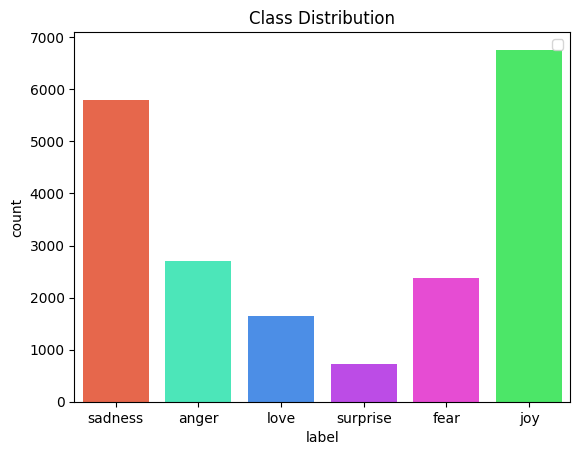

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan palet warna
colors = ["#FF5733", "#33FFC4", "#338AFF", "#C833FF", "#FF33E6", "#33FF57"]

# Buat plot menggunakan palet warna yang ditentukan
sns.countplot(x='label', data=df,  palette=colors, hue='label')
plt.title('Class Distribution')
plt.legend(loc='upper right') #
plt.show()

Pre-Processing Dataset

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with a column named 'label'

# 1. Determine the minimum sample size
MIN_SIZE = np.min(df['label'].value_counts())

# 2. Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=9)

# 3. Separate data by class
joy = df_shuffled[df_shuffled['label'] == 'joy']
sadness = df_shuffled[df_shuffled['label'] == 'sadness']
anger = df_shuffled[df_shuffled['label'] == 'anger']
fear = df_shuffled[df_shuffled['label'] == 'fear']
love = df_shuffled[df_shuffled['label'] == 'love']
surprise = df_shuffled[df_shuffled['label'] == 'surprise']

# 4. Randomly sample data from each class
joy_under = joy.sample(MIN_SIZE)
sadness_under = sadness.sample(MIN_SIZE)
anger_under = anger.sample(MIN_SIZE)
fear_under = fear.sample(MIN_SIZE)
love_under = love.sample(MIN_SIZE)
surprise_under = surprise.sample(MIN_SIZE)

# 5. Concatenate the undersampled data
df_under = pd.concat([joy_under, sadness_under, anger_under, fear_under, love_under, surprise_under])

In [ ]:
# Mengacak posisi baris dalam DataFrame
df_shuffled = df_under.sample(frac=1, random_state=42).reset_index(drop=True)

# Reset index setelah pengacakan
df_shuffled.reset_index(drop=True, inplace=True)

                                            sentence     label
0           i get the feeling that i impressed ecker  surprise
1  i was still looking out for good causes that i...      love
2  i feel no need to offer it though i do feel a ...      fear
3  i recognize most of the frequent posters and n...   sadness
4  i really dont like quinn because i feel like s...     anger
label
surprise    719
love        719
fear        719
sadness     719
anger       719
joy         719
Name: count, dtype: int64


<ipython-input-7-f9b08ea2dd41>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right') #


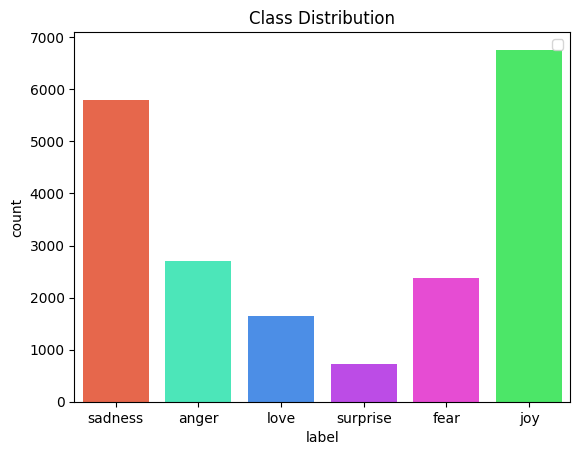

In [ ]:
# Display the first few rows of the downsampled and shuffled DataFrame
print(df_shuffled.head())

# Display the class distribution of the downsampled DataFrame
print(df_shuffled['label'].value_counts())

#show the plot
sns.countplot(x='label', data=df,  palette=colors, hue='label')
plt.title('Class Distribution')
plt.legend(loc='upper right') #
plt.show()

In [ ]:
df_shuffled['label_num'] = df_shuffled['label'].map({
    'joy': 0,
    'sadness': 1,
    'anger': 2,
    'fear': 3,
    'love': 4,
    'surprise': 5
})

In [ ]:
# Display the first few rows of the downsampled and shuffled DataFrame
print(df_shuffled.head())

#show the plot
plt.show()

                                            sentence     label  label_num
0           i get the feeling that i impressed ecker  surprise          5
1  i was still looking out for good causes that i...      love          4
2  i feel no need to offer it though i do feel a ...      fear          3
3  i recognize most of the frequent posters and n...   sadness          1
4  i really dont like quinn because i feel like s...     anger          2


text representation

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Konversi teks menjadi huruf kecil
    text = text.lower()

    doc = nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
df_shuffled['processed_text'] = df_shuffled["sentence"].apply(preprocess)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_shuffled['processed_text'],
    df_shuffled['label_num'],
    test_size=0.2,
    random_state=42
)

KNN Method

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

clf_knn = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       142
           1       0.68      0.72      0.70       142
           2       0.72      0.78      0.75       146
           3       0.73      0.64      0.68       157
           4       0.70      0.60      0.65       139
           5       0.70      0.72      0.71       137

    accuracy                           0.69       863
   macro avg       0.69      0.69      0.69       863
weighted avg       0.69      0.69      0.69       863



Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

clf_nb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Multi_NB', MultinomialNB())
])

clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       142
           1       0.85      0.75      0.80       142
           2       0.82      0.88      0.84       146
           3       0.85      0.73      0.78       157
           4       0.75      0.83      0.79       139
           5       0.71      0.89      0.79       137

    accuracy                           0.79       863
   macro avg       0.79      0.79      0.79       863
weighted avg       0.79      0.79      0.79       863



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

clf_rf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       142
           1       0.79      0.80      0.79       142
           2       0.91      0.79      0.85       146
           3       0.93      0.73      0.81       157
           4       0.80      0.85      0.83       139
           5       0.86      0.96      0.91       137

    accuracy                           0.82       863
   macro avg       0.82      0.82      0.82       863
weighted avg       0.83      0.82      0.82       863



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Definisikan pipeline dengan Logistic Regression
clf_lr = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# Latih model pada data pelatihan
clf_lr.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_lr = clf_lr.predict(X_test)

# Evaluasi kinerja model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       142
           1       0.81      0.83      0.82       142
           2       0.86      0.86      0.86       146
           3       0.87      0.76      0.81       157
           4       0.82      0.84      0.83       139
           5       0.86      0.93      0.90       137

    accuracy                           0.83       863
   macro avg       0.83      0.83      0.83       863
weighted avg       0.83      0.83      0.83       863



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Definisikan pipeline dengan Gradient Boosting Classifier
clf_gb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Gradient_Boosting', GradientBoostingClassifier())
])

# Latih model pada data pelatihan
clf_gb.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_gb = clf_gb.predict(X_test)

# Evaluasi kinerja model
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67       142
           1       0.93      0.70      0.80       142
           2       0.94      0.81      0.87       146
           3       0.94      0.73      0.82       157
           4       0.86      0.85      0.85       139
           5       0.87      0.96      0.91       137

    accuracy                           0.81       863
   macro avg       0.85      0.82      0.82       863
weighted avg       0.85      0.81      0.82       863



Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Definisikan pipeline dengan MLPClassifier
clf_mp = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('MLP', MLPClassifier())
])

# Latih model pada data pelatihan
clf_mp.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_mp = clf_mp.predict(X_test)

# Evaluasi kinerja model
print(classification_report(y_test, y_pred_mp))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       142
           1       0.81      0.78      0.80       142
           2       0.82      0.88      0.85       146
           3       0.80      0.80      0.80       157
           4       0.75      0.72      0.73       139
           5       0.79      0.76      0.78       137

    accuracy                           0.78       863
   macro avg       0.78      0.78      0.78       863
weighted avg       0.78      0.78      0.78       863



BERT

In [ ]:
# Import library yang akan digunakan untuk model BERT
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Tokenisasi teks menggunakan tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Pisahkan data menjadi set pelatihan, validasi, dan uji
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_shuffled['processed_text'],
    df_shuffled['label_num'],
    test_size=0.2,
    random_state=42
)

# Tokenisasi teks dan konversi menjadi tensors
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128, return_tensors='pt')
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Buat dataset PyTorch
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels.reset_index(drop=True)))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(val_labels.reset_index(drop=True)))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Inisialisasi model BERT untuk klasifikasi
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                    num_labels=len(df_shuffled['label_num'].unique()))

# Tentukan optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Tentukan device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Inisialisasi list untuk menyimpan nilai loss dan akurasi
train_losses = []
val_accuracies = []

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Pelatihan model
epochs = 1

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Kode pelatihan yang ada
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # Simpan nilai loss pada setiap epoch

100%|██████████| 216/216 [31:44<00:00,  8.82s/it]


In [ ]:
# Evaluasi model pada set validasi
model.eval()

val_preds = []
val_true = []

for batch in val_loader:
    # Kode evaluasi yang ada
    with torch.no_grad():
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to('cpu')

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        preds = torch.argmax(logits, dim=1).tolist()
        val_preds.extend(preds)
        val_true.extend(labels.tolist())

val_accuracy = accuracy_score(val_true, val_preds)
val_accuracies.append(val_accuracy)  # Simpan nilai akurasi pada setiap epoch

print(f'Epoch {(epoch + 1)}/{epochs}, Average Training Loss: {avg_train_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/1, Average Training Loss: 0.9979, Validation Accuracy: 0.8714


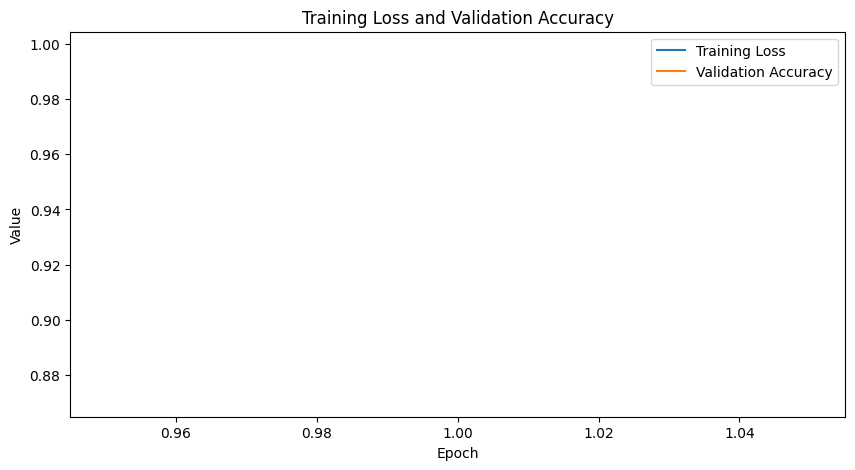

In [ ]:
# Gambar grafik perubahan loss dan akurasi selama pelatihan
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')

plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Validation Accuracy')

plt.legend()
plt.show()

Evaluate the model on the test set

In [ ]:
# Evaluasi model pada set uji
test_texts = df_shuffled['processed_text']
test_labels = df_shuffled['label_num']

test_encodings = tokenizer(list(test_texts), truncation=True, padding=True,
                           max_length=128, return_tensors='pt')

test_dataset = TensorDataset(test_encodings['input_ids'],
                             test_encodings['attention_mask'],
                             torch.tensor(test_labels))

test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
test_preds = []
test_true = []

for batch in test_loader:
    input_ids = batch[0].to(device)
    attention_mask = batch[1].to(device)
    labels = batch[2].to('cpu')

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).tolist()
        test_preds.extend(preds)
        test_true.extend(labels.tolist())

# Evaluasi kinerja model pada data uji
test_accuracy = accuracy_score(test_true, test_preds)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(classification_report(test_true, test_preds))

Test Accuracy: 0.8866
              precision    recall  f1-score   support

           0       0.92      0.76      0.84       719
           1       0.91      0.90      0.90       719
           2       0.95      0.86      0.91       719
           3       0.93      0.83      0.88       719
           4       0.78      0.97      0.86       719
           5       0.88      0.99      0.93       719

    accuracy                           0.89      4314
   macro avg       0.89      0.89      0.89      4314
weighted avg       0.89      0.89      0.89      4314



In [ ]:
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).tolist()
    test_preds.extend(preds)
    test_true.extend(labels.tolist())

# Define label dictionary
label_dict = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5}

test_accuracy = accuracy_score(test_true, test_preds)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Tampilkan classification report
print(classification_report(test_true, test_preds, target_names=label_dict.keys()))

Test Accuracy: 0.8867
              precision    recall  f1-score   support

         joy       0.92      0.76      0.84       721
     sadness       0.91      0.90      0.90       721
       anger       0.95      0.86      0.91       720
        fear       0.93      0.83      0.88       719
        love       0.78      0.97      0.86       723
    surprise       0.88      0.99      0.93       720

    accuracy                           0.89      4324
   macro avg       0.89      0.89      0.89      4324
weighted avg       0.89      0.89      0.89      4324



assess the sentiment of a sentence.

In [ ]:
def predict_sentiment_or_emotion(model, tokenizer, text):
  if isinstance(model, BertForSequenceClassification):
    # Tokenisasi teks baru
    encoded_text = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Kirim ke perangkat yang sesuai
    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)

    # Prediksi sentimen
    with torch.no_grad():
      outputs = model(input_ids, attention_mask=attention_mask)
      logits = outputs.logits

      # ... (Rest of the prediction logic)
  else:
    # Handle other model types if needed
    pass

In [ ]:
# Ambil label kelas dengan nilai tertinggi sebagai sentimen prediksi
  predicted_class = torch.argmax(logits, dim=1).item()

# Ubah kembali indeks ke label sentimen
  sentiment_mapping = {idx: label for label, idx in label_dict.items()}  # Assuming label_dict is defined elsewhere
  predicted_sentiment = sentiment_mapping[predicted_class]

  return predicted_sentiment

  else:  # Jika model machine learning
    processed_text = preprocess(text)  # Asumsikan fungsi preprocess sudah didefinisikan
    emotion_label = model.predict([processed_text])[0]

    # Ubah label numerik menjadi label teks
    emotion_mapping = {0: 'joy', 1: 'sadness', 2: 'anger', 3: 'fear', 4: 'love', 5: 'surprise'}
    predicted_emotion = emotion_mapping[emotion_label]

  return predicted_emotion

IndentationError: unexpected indent (<ipython-input-28-edd17e76c538>, line 2)

include a snippet of the lyrics to a song from the My Chemical Romance Band entitled Cancer, namely 'The Hardest Part of This is Leaving You'.

In [ ]:
# Memilih model transformer (BERT) untuk prediksi sentimen
sentence = "The Hardest Part of This is leaving you"

print(sentence)

print("-" * 50)  # Print a line of dashes for visual separation

predicted_sentiment = predict_sentiment_or_emotion(model, tokenizer, sentence)
print("Predicted Sentiment (BERT):", predicted_sentiment)

# Memilih model machine learning (Random Forest) untuk prediksi emosi
predicted_emotion = predict_sentiment_or_emotion(clf_rf, None, sentence)
print("Predicted Sentiment (Random Forest):", predicted_emotion)

# Memilih model machine learning (K Nearest Neighbour) untuk prediksi emosi
predicted_emotion = predict_sentiment_or_emotion(clf_knn, None, sentence)
print("Predicted Sentiment (KNN):", predicted_emotion)

In [ ]:
# Memilih model machine learning (Naive Bayes) untuk prediksi emosi
predicted_emotion = predict_sentiment_or_emotion(clf_nb, None, sentence)
print("Predicted Sentiment (Naive Bayes):", predicted_emotion)

# Memilih model machine learning (Logistic Regression) untuk prediksi emosi
predicted_emotion = predict_sentiment_or_emotion(clf_lr, None, sentence)
print("Predicted Sentiment (Logistic Regression):", predicted_emotion)

# Memilih model machine learning (Gradient Boosting) untuk prediksi emosi
predicted_emotion = predict_sentiment_or_emotion(clf_gb, None, sentence)
print("Predicted Sentiment (Gradient Boosting):", predicted_emotion)

# Memilih model machine learning (Multi Layer Perceptron) untuk prediksi emosi
predicted_emotion = predict_sentiment_or_emotion(clf_mp, None, sentence)
print("Predicted Sentiment (Multi Layer Perceptron):", predicted_emotion)

implementation ensemble learning and evaluation validation in epoch

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble dengan VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[
        ('KNN', clf_knn),
        ('Naive_Bayes', clf_nb),
        ('Random_Forest', clf_rf),
        ('Logistic_Regression', clf_lr),
        ('Gradient_Boosting', clf_gb),
        ('MLP', clf_mp)
    ],
    voting='soft'
)

# Latih ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_ensemble = ensemble_clf.predict(X_test)
print(classification_report(y_test, y_pred_ensemble))

evaluation loop training BERT

In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}")

    # Evaluate on validation set
    model.eval()
    val_preds, val_true = [], []

    for batch in val_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, axis=1)
            val_preds.extend(preds.cpu().numpy())
            val_true.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_true, val_preds)
    print(f"Epoch {epoch + 1}, Validation Accuracy: {val_accuracy:.4f}")

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break